In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


Rows containing infinite values:
Empty DataFrame
Columns: [1st_serve_win_pct_mean, 1st_serve_in_pct_mean, 2nd_serve_win_pct_mean, 2nd_serve_in_pct_mean, ace_rate, df_rate, bp_saved_pct, return_1st_win_pct, return_2nd_win_pct, return_total_win_pct, 1st_serve_win_pct_std, 2nd_serve_win_pct_std, win_rate, avg_match_length, sets_per_match, win_rate_F, win_rate_QF, win_rate_R16, win_rate_R32, win_rate_R64, win_rate_SF, win_rate_Clay, win_rate_Grass, win_rate_Hard, total_matches, num_years_active]
Index: []

[0 rows x 26 columns]


/var/folders/qt/cbpm3dts7rq346rzkpyck5c00000gn/T/ipykernel_73096/695804574.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-', color='tab:blue')


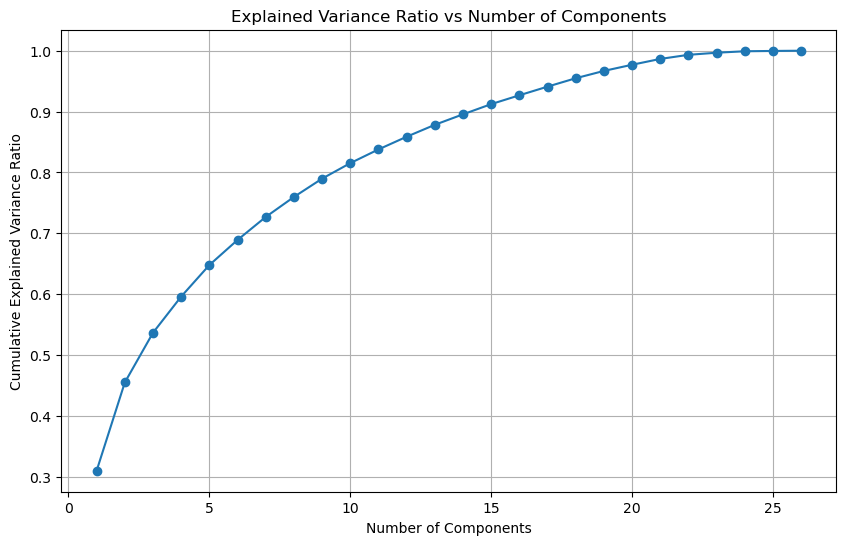


Explained variance ratio for first few components:
PC1: 0.310 (31.0%)
PC2: 0.145 (14.5%)
PC3: 0.082 (8.2%)
PC4: 0.059 (5.9%)
PC5: 0.052 (5.2%)


In [ ]:
df = pd.read_csv('../data/player_features.csv')

# Only keep players who started playing after 1990
df = df[df['first_year'] > 1990]

# Only keep numeric columns
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=["player_id", "first_year", "last_year"])

# Impute missing win_rate values with 0
X = X.fillna(0)

# Check for infinite values and print rows containing them
inf_rows = X[X.isin([np.inf, -np.inf]).any(axis=1)]
print("\nRows containing infinite values:")
print(inf_rows)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-', color='tab:blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.savefig('../output/exploratory/explained_variance_ratio.png', dpi=300)
plt.show()

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    X_pca, 
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])],
    index=df.index
)

# Display first few components and their explained variance
print("\nExplained variance ratio for first few components:")
for i, var in enumerate(explained_variance_ratio[:5], 1):
    print(f"PC{i}: {var:.3f} ({var*100:.1f}%)")


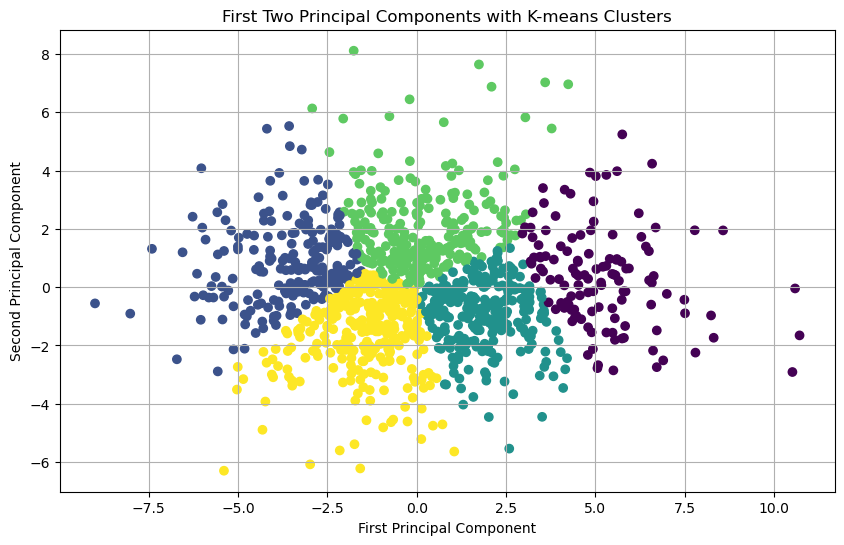

In [54]:
# Perform K-means clustering on the first 2 PCs
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca[:, :2])

# Create scatter plot of first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components with K-means Clusters')
plt.grid(True)
plt.show()


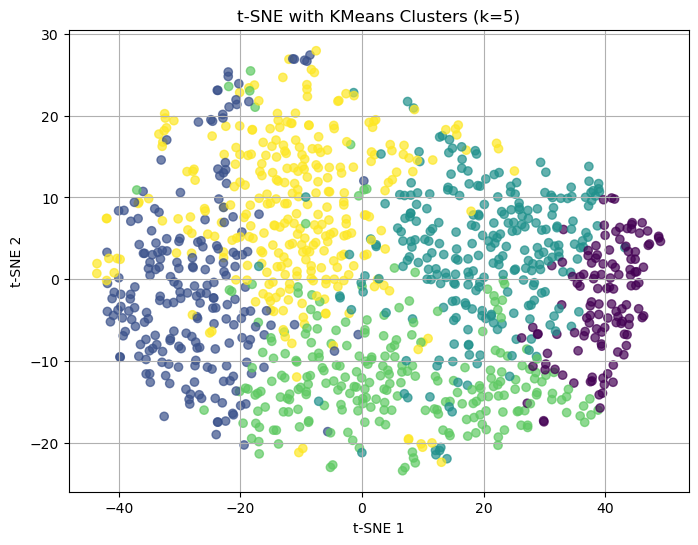

In [55]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("t-SNE with KMeans Clusters (k=5)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()